# Pregunta 1 - Redes Neuronales Recurrentes

### LABOTARORIO

Aplicaremos una RNN, para lograr predecir la calidad del agua, a lo largo de todo el año 2024, para lo cual debe investigar cuales son los indicadores que se deben considerar para establecer el valor del indice de calidad de agua.

### DATASET
Para este labotarorio vamos a crear un Dataset sintetico, que simula los datos del indice de calidad del agua para un periodo desde el año 2000 hasta el año 2023 en tres horas a las 6:00am, 12:00pm y 20:00pm, los parametros que se utilizaron fueron el pH, oxigeno disuelto, conductividad, nitrato, fosfato, turbidez, temperatura, salinidad, plomo y coliformes fecales, que son parametros que se utilizan comúnmente en la evaluacion de la calidad del agua y pueden proporcionar informacion importante sobre su estado que nos dara un resultado de la calidad que va de 0 a 1 siendo 0 calidad muy mala y 1 calidad buena.

In [440]:
# Definir una lista de horas específicas del día (6:00 a.m., 12:00 p.m. y 8:00 p.m.)
horas = [6, 12, 20]

# Generar fechas para cada día a las horas específicas
fechas = pd.date_range(start='2000-01-01', end='2024-12-31', freq='D')  # Generar fechas diarias

# Crear una lista para almacenar las fechas en los momentos específicos del día
fechas_momentos_especificos = []

# Iterar sobre cada fecha y cada hora específica para generar las fechas
for fecha in fechas:
    for hora in horas:
        # Generar la fecha y hora específica para el día actual
        fecha_hora = pd.Timestamp(f'{fecha.year}-{fecha.month}-{fecha.day} {hora}:00:00')
        fechas_momentos_especificos.append(fecha_hora)

# Convertir la lista de fechas a un DatetimeIndex
fechas = pd.DatetimeIndex(fechas_momentos_especificos)
# Generar datos sintéticos para los indicadores
data = {
    'Fecha': fechas,
    'pH': np.random.uniform(low=6.0, high=9.0, size=len(fechas)),
    'Oxigeno_disuelto': np.random.uniform(low=1, high=10, size=len(fechas)),
    'Conductividad': np.random.uniform(low=200, high=1000, size=len(fechas)),
    'Nitrato': np.random.uniform(low=0, high=20, size=len(fechas)),
    'Fosfato': np.random.uniform(low=0, high=15, size=len(fechas)),
    'Turbidez': np.random.uniform(low=10, high=150, size=len(fechas)),
    'Temperatura': np.random.uniform(low=15, high=35, size=len(fechas)),
    'Salinidad': np.random.uniform(low=0, high=50, size=len(fechas)),
    'Plomo': np.random.uniform(low=0, high=1.5, size=len(fechas)),
    'Coliformes_fecales': np.random.uniform(low=0, high=500, size=len(fechas))
}

# Crear DataFrame
df = pd.DataFrame(data)

# Definir umbrales para cada parámetro
umbrales = {
    'pH': (6.5, 8.5),
    'Oxigeno_disuelto': (5, None),  
    'Conductividad': (None, 800),    
    'Nitrato': (None, 10),          
    'Fosfato': (None, 2),            
    'Turbidez': (None, 60),         
    'Temperatura': (15, 30),
    'Salinidad': (None, 35),         
    'Plomo': (None, 0.05),          
    'Coliformes_fecales': (None, 50) 
}

# Función para calcular la calidad del agua basada en umbrales
def calcular_calidad_agua(row):
    calidad = 1  # Calidad inicialmente buena
    
    for parametro, (umbral_min, umbral_max) in umbrales.items():
        valor = row[parametro]
        
        if umbral_min is not None and valor < umbral_min:
            calidad -= 0.20
        elif umbral_max is not None and valor > umbral_max:
            calidad -= 0.20
            
    # Ajustar a cero si la calidad es negativa
    #calidad = max(calidad, 0)
    
    return calidad

# Calcular calidad del agua y agregarla como columna al DataFrame
df['Calidad_agua'] = df.apply(calcular_calidad_agua, axis=1)

# Función para asignar categorías de calidad del agua
def asignar_categoria_calidad(calidad):
    if calidad >= 0.75:
        return 'Buena'
    elif calidad >= 0.5:
        return 'Regular'
    elif calidad >= 0.25:
        return 'Mala'
    else:
        return 'Muy mala'

# Aplicar la función a la columna 'Calidad_agua' para asignar categorías
df['Estado_calidad_agua'] = df['Calidad_agua'].apply(asignar_categoria_calidad)

# Mostrar las primeras filas del DataFrame con las nuevas columnas
print(df.head())

# Guardar el DataFrame como CSV
df.to_csv('dataset_calidad_agua.csv', index=False)


                Fecha        pH  Oxigeno_disuelto  Conductividad    Nitrato  \
0 2000-01-01 06:00:00  6.346397          5.155500     371.894626   6.299713   
1 2000-01-01 12:00:00  6.750526          2.509074     688.622841  11.880686   
2 2000-01-01 20:00:00  7.062032          5.627903     885.427228  19.057171   
3 2000-01-02 06:00:00  6.674986          9.307281     527.893725  18.585383   
4 2000-01-02 12:00:00  6.332830          8.244736     626.225293   7.296306   

     Fosfato    Turbidez  Temperatura  Salinidad     Plomo  \
0  13.099415   87.926774    24.889763  43.731060  0.756732   
1   1.378768   10.763112    18.084259   5.239528  0.860785   
2   2.193114   66.136244    30.774144   0.095983  0.968737   
3   2.850896   85.237276    33.483693  33.577068  1.486088   
4  11.439569  116.493248    32.275178  23.499385  0.494702   

   Coliformes_fecales  Calidad_agua Estado_calidad_agua  
0          275.472546          -0.2            Muy mala  
1           15.232918           0.4 

In [441]:
# librerias a utilizar en el notebook
import numpy as np # libreria para manejo de vectores y matrices
import pandas as pd # libreria para manejo de dataframes

### Dataset

Utilizamos el dataset sintetico previamente generado

In [442]:
# cargamos el dataset csv
df = pd.read_csv('dataset_calidad_agua.csv')
df

,Fecha,pH,Oxigeno_disuelto,Conductividad,Nitrato,Fosfato,Turbidez,Temperatura,Salinidad,Plomo,Coliformes_fecales,Calidad_agua,Estado_calidad_agua
0,2000-01-01 06:00:00,6.346397,5.155500,371.894626,6.299713,13.099415,87.926774,24.889763,43.731060,0.756732,275.472546,-2.000000e-01,Muy mala
1,2000-01-01 12:00:00,6.750526,2.509074,688.622841,11.880686,1.378768,10.763112,18.084259,5.239528,0.860785,15.232918,4.000000e-01,Mala
2,2000-01-01 20:00:00,7.062032,5.627903,885.427228,19.057171,2.193114,66.136244,30.774144,0.095983,0.968737,135.380733,-4.000000e-01,Muy mala
3,2000-01-02 06:00:00,6.674986,9.307281,527.893725,18.585383,2.850896,85.237276,33.483693,33.577068,1.486088,247.593619,-2.000000e-01,Muy mala
4,2000-01-02 12:00:00,6.332830,8.244736,626.225293,7.296306,11.439569,116.493248,32.275178,23.499385,0.494702,154.240422,-2.000000e-01,Muy mala
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27391,2024-12-30 12:00:00,7.481227,4.320524,236.906931,16.634994,5.092320,60.772662,23.559702,35.598111,1.245416,54.082022,-4.000000e-01,Muy mala
27392,2024-12-30 20:00:00,7.423868,4.140883,810.107666,2.563908,12.140587,15.201495,16.562311,43.720855,1.017052,5.252891,5.551115e-17,Muy mala
27393,2024-12-31 06:00:00,7.609358,4.796165,404.243099,10.056070,6.084728,44.389689,29.587839,8.647804,0.876789,277.985405,5.551115e-17,Muy mala
27394,2024-12-31 12:00:00,8.123666,5.734073,791.737813,19.261481,11.726807,23.060082,29.061896,11.160765,0.032683,385.441450,4.000000e-01,Mala


In [443]:
# agarramos la columna Calidad_agua que es la columna que nos proporciona la calidad del agua
data = df['Calidad_agua'].values
data.shape

(27396,)

In [444]:
# Definir la longitud de las secuencias
longitud_secuencia = 40

# Calcular el número de secuencias completas que se pueden formar
num_secuencias = len(data) // longitud_secuencia

# Inicializar listas vacías para almacenar X e Y
series = []

# Crear las secuencias de entrada (X) y sus correspondientes valores objetivo (Y)
for i in range(num_secuencias):
    secuencia = data[i * longitud_secuencia: (i + 1) * longitud_secuencia]
    series.append(secuencia)

# Convertir las listas en arrays de NumPy
series = np.array(series).astype(np.float32)

# Cambiar la forma de X a (número de secuencias, longitud de secuencia, número de características)
series = np.reshape(series, (series.shape[0], series.shape[1], 1))

# Verificar las dimensiones de X e Y
print("Dimensiones de series:", series.shape)

Dimensiones de series: (684, 40, 1)


In [445]:
print(series[0])

[[-2.000000e-01]
 [ 4.000000e-01]
 [-4.000000e-01]
 [-2.000000e-01]
 [-2.000000e-01]
 [-2.000000e-01]
 [ 4.000000e-01]
 [ 4.000000e-01]
 [ 5.551115e-17]
 [ 2.000000e-01]
 [ 5.551115e-17]
 [-6.000000e-01]
 [ 2.000000e-01]
 [-6.000000e-01]
 [ 5.551115e-17]
 [-4.000000e-01]
 [ 5.551115e-17]
 [ 5.551115e-17]
 [-4.000000e-01]
 [ 5.551115e-17]
 [-2.000000e-01]
 [ 5.551115e-17]
 [-2.000000e-01]
 [-2.000000e-01]
 [ 5.551115e-17]
 [ 4.000000e-01]
 [-4.000000e-01]
 [ 5.551115e-17]
 [-2.000000e-01]
 [ 6.000000e-01]
 [-4.000000e-01]
 [-4.000000e-01]
 [ 5.551115e-17]
 [ 2.000000e-01]
 [ 5.551115e-17]
 [-6.000000e-01]
 [ 2.000000e-01]
 [-2.000000e-01]
 [ 2.000000e-01]
 [-2.000000e-01]]


### Normalizamos

Para normalizar los datos, sacaremos el valor mayor y menor de la temperatura y lo normalizaremos entre -1 y 1.

In [446]:
# normalizar los datos de entrada y salida entre -1 y 1
# Valores mínimos y máximos en tu dataset original
min_valor = series.min() 
max_valor = series.max()

# Rango al que quieres normalizar
rango_normalizado = (-1, 1)

# Normalizar el dataset
series_normalized = (series - min_valor) / (max_valor - min_valor) * (rango_normalizado[1] - rango_normalizado[0]) + rango_normalizado[0]

# Verificar los valores normalizados
print("Valores normalizados:", series_normalized.min(), series_normalized.max())
series = series_normalized

Valores normalizados: -1.0 1.0


In [447]:
print(series[0])

[[-0.11111104]
 [ 0.5555556 ]
 [-0.3333333 ]
 [-0.11111104]
 [-0.11111104]
 [-0.11111104]
 [ 0.5555556 ]
 [ 0.5555556 ]
 [ 0.11111116]
 [ 0.33333337]
 [ 0.11111116]
 [-0.5555556 ]
 [ 0.33333337]
 [-0.5555556 ]
 [ 0.11111116]
 [-0.3333333 ]
 [ 0.11111116]
 [ 0.11111116]
 [-0.3333333 ]
 [ 0.11111116]
 [-0.11111104]
 [ 0.11111116]
 [-0.11111104]
 [-0.11111104]
 [ 0.11111116]
 [ 0.5555556 ]
 [-0.3333333 ]
 [ 0.11111116]
 [-0.11111104]
 [ 0.7777779 ]
 [-0.3333333 ]
 [-0.3333333 ]
 [ 0.11111116]
 [ 0.33333337]
 [ 0.11111116]
 [-0.5555556 ]
 [ 0.33333337]
 [-0.11111104]
 [ 0.33333337]
 [-0.11111104]]


### Clase TimeSeriesDataset

Esta clase nos ayudará a crear un dataset de series de tiempo.

In [448]:
import torch
from torch.utils.data import Dataset, DataLoader

class TimeSeriesDataset(Dataset):
  def __init__(self, X, y=None, train=True):
    self.X = X
    self.y = y
    self.train = train

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    if self.train:
      return torch.from_numpy(self.X[ix]), torch.from_numpy(self.y[ix])
    return torch.from_numpy(self.X[ix])

Separamos los datos en `train`, `valid` y `test` y luego creamos un dataset con los datos de `train`, `valid` y `test`. Posteriormente, creamos un dataloader para cada uno de los datasets. 

# NOTA IMPORTANTE
Como queremos predecir la calidad del agua en todo el 2024 y el 2024 tiene 366 dias entonces debemos predecir 1098 datos, y como los datos estan agrupados en series de 40 nuestros estos datos estarian en las ultimas 28

In [449]:
n_steps = 60
X_train, y_train = series[:500, :n_steps], series[:500, -20:, 0]
X_valid, y_valid = series[500:625, :n_steps], series[500:625, -20:, 0]
X_test, y_test = series[625:, :n_steps], series[625:, -20:, 0]

print(X_train.shape, y_train.shape)

dataset = {
    'train': TimeSeriesDataset(X_train, y_train),
    'eval': TimeSeriesDataset(X_valid, y_valid),
    'test': TimeSeriesDataset(X_test, y_test, train=False)
}

dataloader = {
    'train': DataLoader(dataset['train'], shuffle=True, batch_size=64),
    'eval': DataLoader(dataset['eval'], shuffle=False, batch_size=64),
    'test': DataLoader(dataset['test'], shuffle=False, batch_size=64)
}

(500, 40, 1) (500, 20)


In [450]:
X_test.shape, y_test.shape

((59, 40, 1), (59, 20))

Metodo para graficar las series de tiempo. `plot_series.`

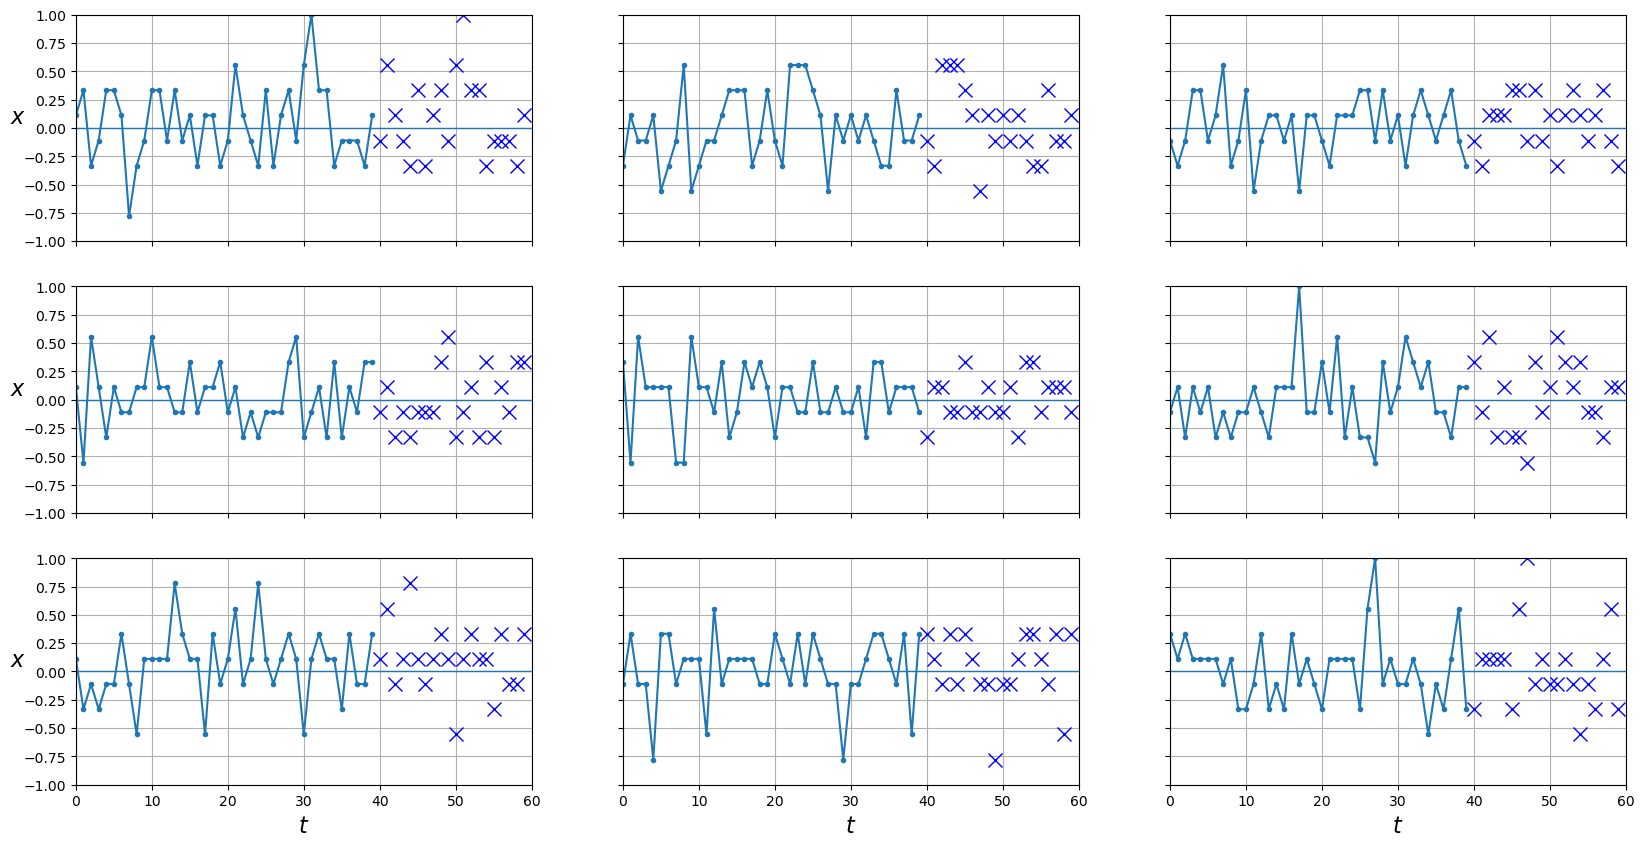

In [451]:
import matplotlib.pyplot as plt

def plot_series(series, y=None, y_pred=None, y_pred_std=None, x_label="$t$", y_label="$x$"):
  r, c = 3, 3
  fig, axes = plt.subplots(nrows=r, ncols=c, sharey=True, sharex=True, figsize=(20, 10))
  for row in range(r):
    for col in range(c):
        plt.sca(axes[row][col])
        ix = col + row*c
        plt.plot(series[ix, :], ".-")
        if y is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y[ix])), y[ix], "bx", markersize=10)
        if y_pred is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix], "ro")
        if y_pred_std is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix] + y_pred_std[ix])
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix] - y_pred_std[ix])
        plt.grid(True)
        plt.hlines(0, 0, 100, linewidth=1)
        plt.axis([0, len(series[ix, :])+len(y[ix]), -1, 1])
        if x_label and row == r - 1:
          plt.xlabel(x_label, fontsize=16)
        if y_label and col == 0:
          plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.show()

plot_series(X_test, y_test)

### Modelo RNN

El modelo RNN que utilizaremos es un modelo de 3 capas. La primera capa es una capa `RNN` con 30 neuronas, la segunda capa es una capa `RNN` con 30 neuronas y la tercera capa es una capa `Linear` con 1 neurona de salida.

In [452]:
class DeepRNN(torch.nn.Module):
  def __init__(self, n_out=20):
    super().__init__()
    self.rnn = torch.nn.RNN(input_size=1, hidden_size=30, num_layers=2, batch_first=True)
    self.fc = torch.nn.Linear(30, n_out)

  def forward(self, x):
    x, h = self.rnn(x)
    x = self.fc(x[:,-1])
    return x

### Entrenamiento

La función `fit` nos ayudará a entrenar el modelo.

In [453]:
from tqdm import tqdm
device = "cuda" if torch.cuda.is_available() else "cpu"

def fit(model, dataloader, epochs=10):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.MSELoss()
    bar = tqdm(range(1, epochs+1))
    for epoch in bar:
        model.train()
        train_loss = []
        for batch in dataloader['train']:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        model.eval()
        eval_loss = []
        with torch.no_grad():
            for batch in dataloader['eval']:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                eval_loss.append(loss.item())
        bar.set_description(f"loss {np.mean(train_loss):.5f} val_loss {np.mean(eval_loss):.5f}")

# funcion para predecir los valores de la serie de tiempo con el modelo entrenado
def predict(model, dataloader):
    model.eval()
    with torch.no_grad():
        preds = torch.tensor([]).to(device)
        for batch in dataloader:
            X = batch
            X = X.to(device)
            pred = model(X)
            preds = torch.cat([preds, pred])
        return preds

In [454]:
# instanciamos el modelo y lo entrenamos
rnn = DeepRNN()
fit(rnn, dataloader, epochs=100)

loss 0.00161 val_loss 0.00181: 100%|██████████| 100/100 [00:07<00:00, 14.12it/s]


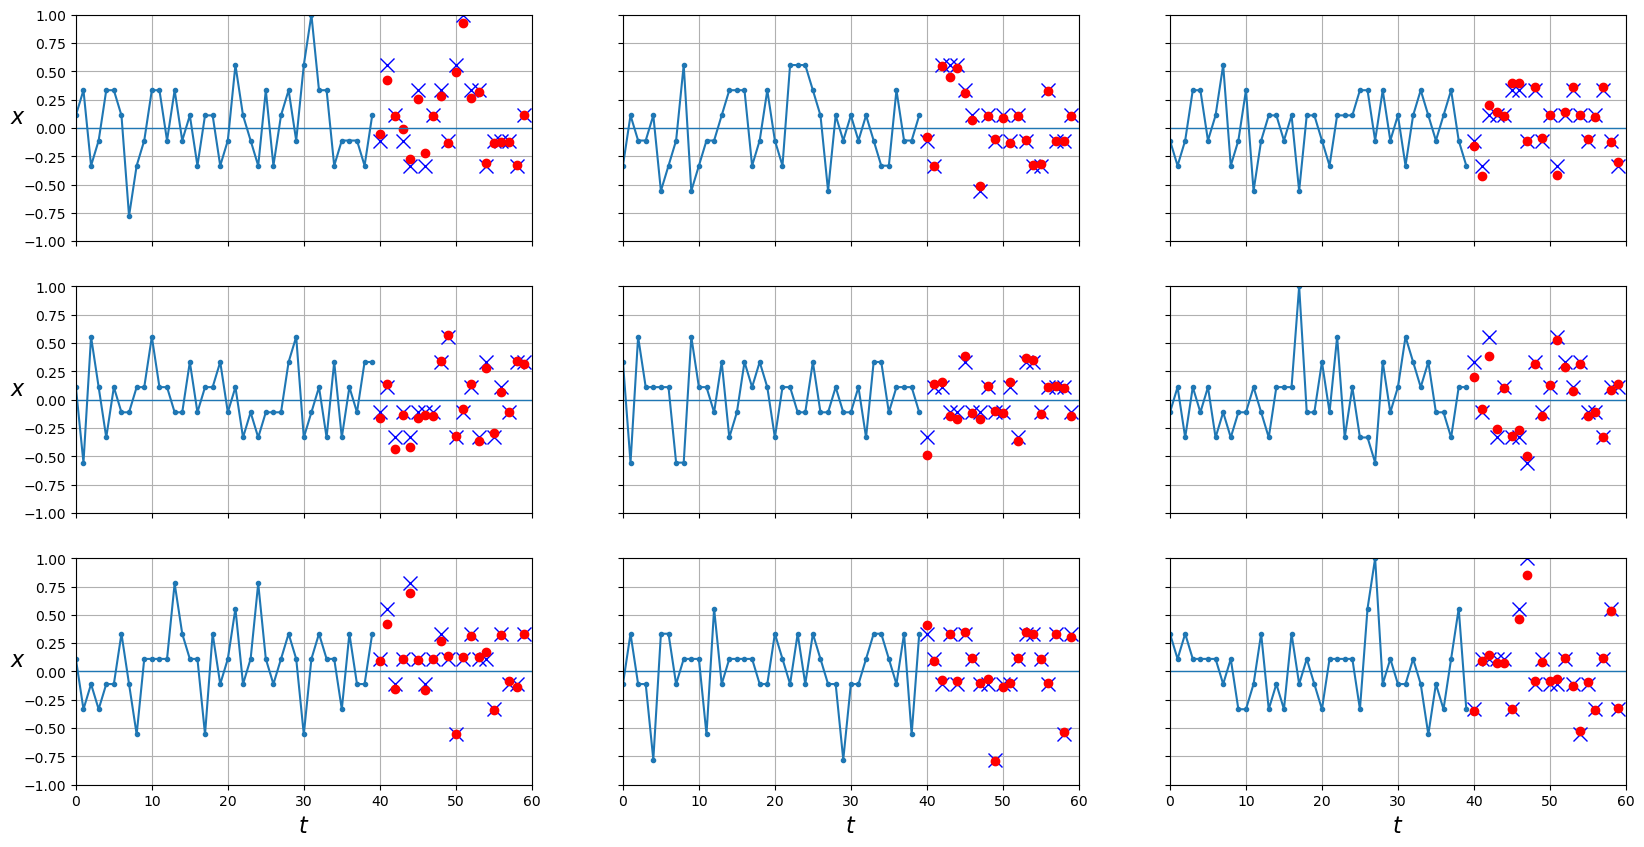

0.0014533354

In [455]:
# predecimos los valores de la serie de tiempo
from sklearn.metrics import mean_squared_error

y_pred = predict(rnn, dataloader['test'])
plot_series(X_test, y_test, y_pred.cpu().numpy())
mean_squared_error(y_test, y_pred.cpu())